In [1]:
import pandas as pd
import numpy as np
import omicverse as ov
import anndata
print(f'omicverse version: {ov.__version__}')
import scanpy as sc
print(f'scanpy version: {sc.__version__}')
ov.ov_plot_set()
from scipy import sparse
import celltypist
print(f'celltypist version: {celltypist.__version__}')
from celltypist import models
celltypist.models.download_models()
model = models.Model.load(model = 'Human_AdultAged_Hippocampus.pkl')
#The model summary information.
model



📂 Storing models in /home/lfzhang/.celltypist/data/models
⏩ Skipping [1/44]: Immune_All_Low.pkl (file exists)
⏩ Skipping [2/44]: Immune_All_High.pkl (file exists)
⏩ Skipping [3/44]: Adult_CynomolgusMacaque_Hippocampus.pkl (file exists)
⏩ Skipping [4/44]: Adult_Human_PancreaticIslet.pkl (file exists)
⏩ Skipping [5/44]: Adult_Human_Skin.pkl (file exists)
⏩ Skipping [6/44]: Adult_Mouse_Gut.pkl (file exists)
⏩ Skipping [7/44]: Adult_Mouse_OlfactoryBulb.pkl (file exists)
⏩ Skipping [8/44]: Adult_Pig_Hippocampus.pkl (file exists)
⏩ Skipping [9/44]: Adult_RhesusMacaque_Hippocampus.pkl (file exists)
⏩ Skipping [10/44]: Autopsy_COVID19_Lung.pkl (file exists)
⏩ Skipping [11/44]: COVID19_HumanChallenge_Blood.pkl (file exists)
⏩ Skipping [12/44]: COVID19_Immune_Landscape.pkl (file exists)
⏩ Skipping [13/44]: Cells_Fetal_Lung.pkl (file exists)
⏩ Skipping [14/44]: Cells_Intestinal_Tract.pkl (file exists)
⏩ Skipping [15/44]: Cells_Lung_Airway.pkl (file exists)
⏩ Skipping [16/44]: Developing_Human_Bra


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.3, Tutorials: https://omicverse.readthedocs.io/
omicverse version: 1.5.3
scanpy version: 1.9.5
celltypist version: 1.6.1


CellTypist model with 15 cell types and 2501 features
    date: 2023-07-16 10:03:59.893289
    details: cell types from the hippocampus of adult and aged humans
    source: https://doi.org/10.1038/s41586-022-04912-w
    version: v1
    cell types: Astrocytes, CA1_neurons, ..., mOli
    features: A2M, AAK1, ..., ZSWIM6

In [2]:
model = models.Model.load(model = 'Human_AdultAged_Hippocampus.pkl')
# load data
adata = sc.read_h5ad('./adata_processed.h5ad')
# annotate
predictions = celltypist.annotate(adata, model = model, majority_voting = True)



⚠️ Warning: invalid expression matrix, expect all genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 154275 cells and 2000 genes
🔗 Matching reference genes in the model
🧬 733 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 25


running Leiden clustering
    finished: found 342 clusters and added
    'over_clustering', the cluster labels (adata.obs, categorical) (0:02:05)


🗳️ Majority voting the predictions
✅ Majority voting done!


In [3]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
F1.AAACCCATCGGCATTA-1.ExN.ExN7,CA1_neurons,41,CA1_neurons
F1.AAACGAATCAGGGTAG-1.InN.InN8_Mix,GABA_neurons,15,Cajal-Retzius
F1.AAACGAATCGGAATGG-1.Oli.Oli3,CA1_neurons,30,CA1_neurons
F1.AAACGCTAGGACTTCT-1.Ast.Ast1,Astrocytes,45,Astrocytes
F1.AAACGCTGTGACTAAA-1.ExN.ExN17,CA1_neurons,125,CA1_neurons
...,...,...,...
M9.TTTGGTTTCCAATGGT-1.Oli.Oli1,mOli,306,GABA_neurons
M9.TTTGTCAAGTGGTAAT-1.OPC.OPC2,OPCs,16,OPCs
M9.TTTGTCACAAGACGTG-1.InN.InN7_Mix,Cajal-Retzius,126,Cajal-Retzius
M9.TTTGTCACATGCCTTC-1.InN.InN5_SST,ChoroidPlexus,224,GABA_neurons


In [4]:
adata = predictions.to_adata()
adata.obs

,index,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,...,leiden_res0.9,leiden_res1.1,leiden_res1.3,leiden_res1.5,major_celltype,gender,predicted_labels,over_clustering,majority_voting,conf_score
F1.AAACCCATCGGCATTA-1.ExN.ExN7,1,2364,7.768533,4215,8.346642,8.778173,18,2.944439,0.427046,46,...,7,5,5,4,Ex_Neuron,Female,CA1_neurons,41,CA1_neurons,1.046982e-05
F1.AAACGAATCAGGGTAG-1.InN.InN8_Mix,2,3991,8.292048,10982,9.304104,11.710071,67,4.219508,0.610089,41,...,21,21,22,22,Inhib_Neuron,Female,GABA_neurons,15,Cajal-Retzius,1.071146e-04
F1.AAACGAATCGGAATGG-1.Oli.Oli3,3,1566,7.356918,2499,7.824046,10.244098,9,2.302585,0.360144,11,...,3,2,2,2,Ex_Neuron,Female,CA1_neurons,30,CA1_neurons,7.432649e-05
F1.AAACGCTAGGACTTCT-1.Ast.Ast1,4,589,6.380123,713,6.570883,12.622721,4,1.609438,0.561010,9,...,4,4,3,3,Astro,Female,Astrocytes,45,Astrocytes,2.687501e-02
F1.AAACGCTGTGACTAAA-1.ExN.ExN17,5,10044,9.214830,95773,11.469747,11.582596,306,5.726848,0.319505,142,...,1,0,1,1,Ex_Neuron,Female,CA1_neurons,125,CA1_neurons,3.660567e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9.TTTGGTTTCCAATGGT-1.Oli.Oli1,160706,767,6.643790,980,6.888572,11.734694,2,1.098612,0.204082,3,...,5,6,4,33,Inhib_Neuron,Male,mOli,306,GABA_neurons,2.721348e-05
M9.TTTGTCAAGTGGTAAT-1.OPC.OPC2,160707,605,6.406880,753,6.625392,13.147410,5,1.791759,0.664011,5,...,6,7,7,8,Opc,Male,OPCs,16,OPCs,7.817965e-02
M9.TTTGTCACAAGACGTG-1.InN.InN7_Mix,160708,1691,7.433667,2462,7.809135,9.666937,3,1.386294,0.121852,14,...,16,17,16,17,Inhib_Neuron,Male,Cajal-Retzius,126,Cajal-Retzius,7.036211e-04
M9.TTTGTCACATGCCTTC-1.InN.InN5_SST,160709,1882,7.540622,2894,7.970740,10.850035,9,2.302585,0.310988,37,...,12,11,11,12,Inhib_Neuron,Male,ChoroidPlexus,224,GABA_neurons,9.668437e-07


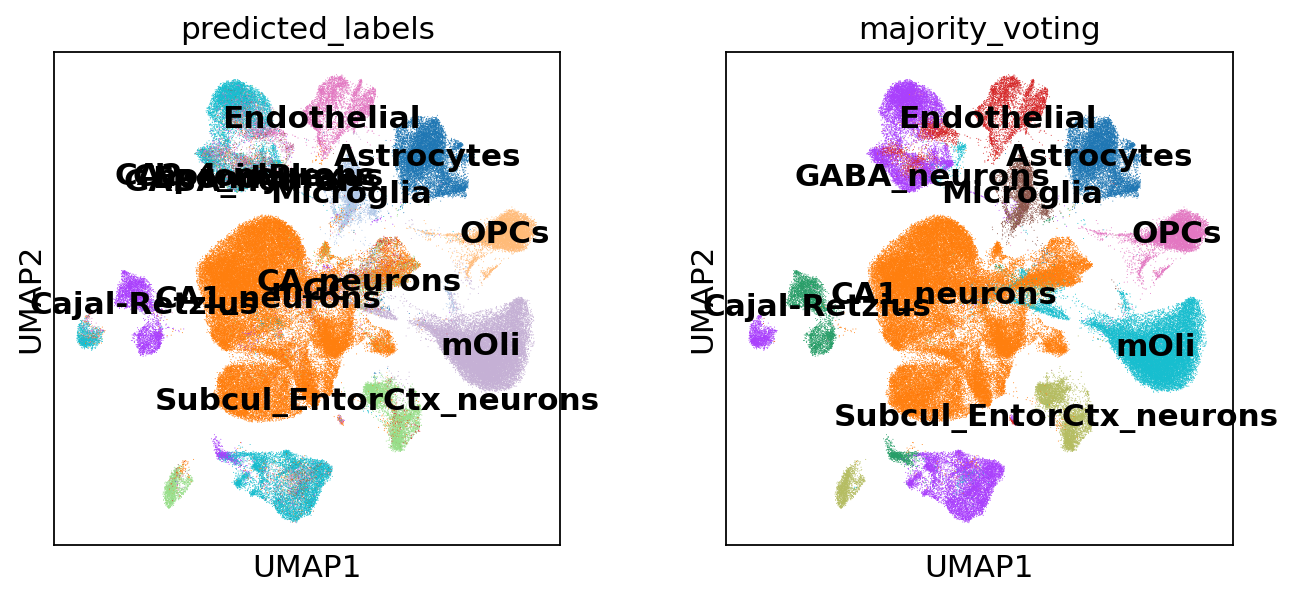

In [5]:
sc.pl.umap(adata, color = ['predicted_labels', 'majority_voting'], legend_loc = 'on data')

In [7]:
adata.write('adata_processed.h5ad')